# **Laboratorio: Caracterización de textura mediante LBP **#
## Objetivos##

El objetivo de este laboratorio es conocer, con mayor profundidad y en un escenario práctico, uno de los operadores más comunes en el procesado de imagen: los patrones binarios locales (LBP por sus siglas en inglés, local binary patterns). Entre otros usos, este operador es empleado habitualmente para la caracterización de textura.

## Integrantes##
-   Kevin Calle
-   Javier Parra
-   Verónica Chimbo
-	Alberto Daniel Velástegui
-	Santiago Solórzano
-	Andrés Sierra

## **Fecha**##
04/07/2018

In [1]:
# Cargar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters, feature
from skimage.feature import local_binary_pattern
from skimage.transform import rotate
import warnings
warnings.filterwarnings("ignore")

### 1. Leer las texturas###




In [2]:
#Hacemos lectura de las imágenes proporcionadas
textura1=io.imread(fname="texture1.gif", as_grey=True)
textura2=io.imread(fname="texture2.gif", as_grey=True)
textura3=io.imread(fname="texture3.gif", as_grey=True)

### 2.Visualización de las imágenes###


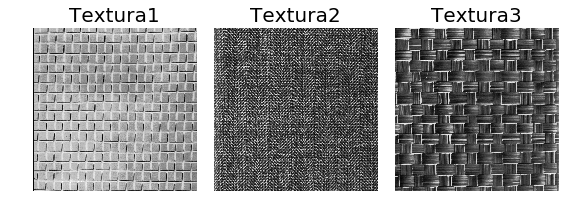

In [3]:
#Mostramos las imágenes
def imshow(textura1,textura2,textura3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4),
                             sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(textura1, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('Textura1', fontsize=20)

    ax[1].imshow(textura2, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('Textura2', fontsize=20)

    ax[2].imshow(textura3, cmap=plt.cm.gray)
    ax[2].axis('off')
    ax[2].set_title('Textura3', fontsize=20)
    
   
    fig.tight_layout()
    plt.show()

imshow(textura1,textura2,textura3)

### 3. Calcular el LBP para cada textura###

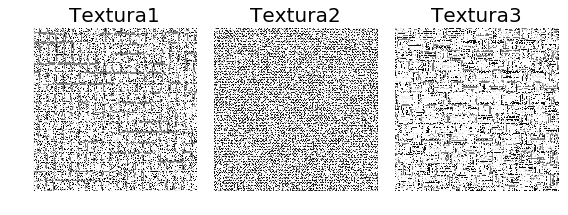

In [28]:
#Aplicamos LBP para la clasificación de texturas
#LBP mira los puntos que rodean un punto central y prueba si los puntos circundantes 
#son mayores o menores que el punto central (es decir, da un resultado binario).
#Definimos el método para determinar el patrón
#'Uniform' invarianza de rotación mejorada con patrones uniformes y cuantización más fina del espacio angular que es la escala de grises y la rotación invariante.
METHOD = 'uniform'
# Definimos el número de puntos de referencia adyacentes circularmente simétricos (cuantificación del espacio angular).
P = 24
# Definimos el radio de círculo (resolución espacial del operador).
R = 3
#Aplicamos el método de LBP para cada textura
lbptextura1=local_binary_pattern(textura1, P, R,METHOD );
lbptextura2=local_binary_pattern(textura2,P,R,METHOD );
lbptextura3=local_binary_pattern(textura3,P,R,METHOD );
#Mostramos las imágenes resultates al aplicar el método
imshow(lbptextura1,lbptextura2,lbptextura3)

### 4. Mostrar los datos de la Matríz###

In [5]:
np.unique(lbptextura1.ravel())


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

### 5. Obtener el Histograma###

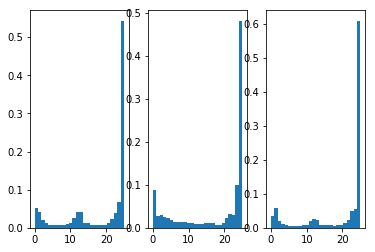

In [6]:
# hacemos uso del histograma del resultado  
f,(ax0, ax1, ax2)=plt.subplots(1,3)
ax0.hist(lbptextura1.ravel(),normed=True, bins=P+2)
ax1.hist(lbptextura2.ravel(),normed=True, bins=P+2)
ax2.hist(lbptextura3.ravel(),normed=True, bins=P+2)
plt.show()

### 6. Propiedad de invarianza###

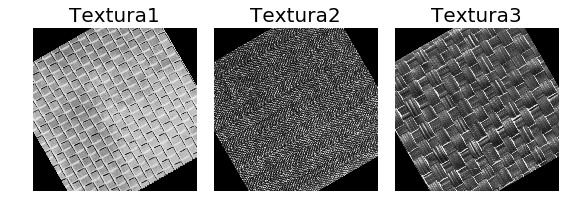

In [29]:
#Invarianzas: Traslación, Cambios monotónicos del nivel de gris
#Invarianza a la rotación: se agrupan las etiquetas uniformes al menor cardinal

#Para comprobar la propiedad de invarianza rotamos las imágenes a un ángulo de 120º
text1r= rotate(textura1, angle=120, resize=False)
text2r= rotate(textura2, angle=120, resize=False)
text3r= rotate(textura3, angle=120, resize=False)
#mostramos las imágenes
imshow(text1r,text2r,text3r)


In [14]:
# Aplicamos el operador LBP para las texturas con rotación
METHOD = 'uniform'
P = 24
R = 3
lbptextura1_r=local_binary_pattern(text1r, P, R,METHOD );
lbptextura2_r=local_binary_pattern(text2r, P, R,METHOD );
lbptextura3_r=local_binary_pattern(text3r, P, R,METHOD );

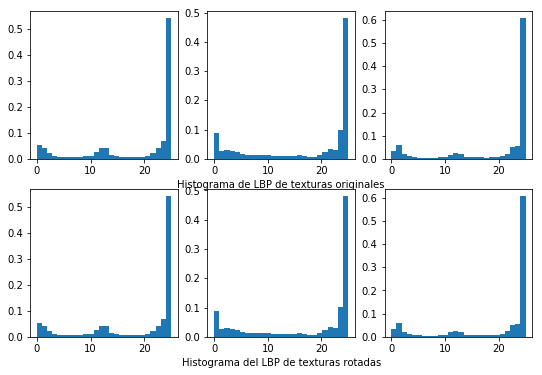

In [27]:
#Presentamos el histograma del resultado 
f,((ax00, ax01, ax02),(ax10,ax11,ax12))=plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
ax00.hist(lbptextura1.ravel(),normed=True, bins=P+2)
ax01.hist(lbptextura2.ravel(),normed=True, bins=P+2)
ax01.set_xlabel('Histograma de LBP de texturas originales')
ax02.hist(lbptextura3.ravel(),normed=True, bins=P+2)

ax10.hist(lbptextura1.ravel(),normed=True, bins=P+2)
ax11.hist(lbptextura2.ravel(),normed=True, bins=P+2)
ax11.set_xlabel('Histograma del LBP de texturas rotadas')
ax12.hist(lbptextura3.ravel(),normed=True, bins=P+2)


plt.show()



### 7. Conclusiones###

Al finalizar el presente laboratorio podemos decir que:
1. LBP mira los puntos que rodean un punto central y prueba si los puntos circundantes son mayores o menores que el punto central (es decir, da un resultado binario).
2. El histograma del resultado de LBP es una buena medida para clasificar las texturas.
3. Se comprueba que el operador LBP uniforme es invariante a rotación. Es decir, el resultado del mismo es independiente de la orientación de la textura o imagen de entrada, como se puede apreciar en el apartado 6 con una rotación de 120º el resultado del histograma es el mismo.
4. Es una técnica descriptiva simple pero altamente efectiva para la clasificación de objetos dentro de la visión por computador que filtra los píxeles adyacentes mediante consideraciones determinadas y obtiene un valor binario representativo.  Codifica la relación del píxel central con la intensidad de color de los píxeles aledaños. Debido a su elevada capacidad discriminatoria, constituye una aproximación usual para la solución de multitud de problemas. Probablemente  una de sus características mas importantes es la robustez de su invariante ante variaciones lumínicas.
5. Una variante ampliamente usada de los LBP son los conocidos como patrones uniformes. Seleccionando solo patrones uniformes se logra reducir la longitud del vector característico y mejorar los clasificadores, adicionalmente,  se puede aplicar esta técnica para obtener invarianza ante rotaciones. 

